In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
from datetime import datetime

import yfinance as yf

In [2]:
def stock_data2(ticker, start_date, end_date):

    df = yf.download(ticker, start = start_date, end = end_date, progress = False)
    df.reset_index(inplace=True)
    nrows = df.shape[0]
    df['5 MA'] = df['Adj Close'].rolling(5).mean()
    df['10 MA'] = df['Adj Close'].rolling(10).mean()
    df['20 MA'] = df['Adj Close'].rolling(20).mean()
    df['50 MA'] = df['Adj Close'].rolling(50).mean()
    df['100 MA'] = df['Adj Close'].rolling(100).mean()
    df['Daily Change (ln)'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    df['Percent Return'] = df['Adj Close'].pct_change()

    return df


df_wire = stock_data2('WIRE', start_date = '2020-01-01', end_date = '2024-02-16')
df_wire.head()

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Date,Open,High,Low,Close,Adj Close,Volume,5 MA,10 MA,20 MA,50 MA,100 MA,Daily Change (ln),Percent Return
0,2020-01-02,58.060001,58.060001,56.959999,57.830002,57.616325,63600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,57.049999,58.080002,56.849998,57.990002,57.775734,127400,NaN,NaN,NaN,NaN,NaN,0.002763,0.002767
2,2020-01-06,57.570000,57.799999,56.410000,56.770000,56.560246,78100,NaN,NaN,NaN,NaN,NaN,-0.021262,-0.021038
3,2020-01-07,56.509998,56.820000,56.049999,56.790001,56.580166,59300,NaN,NaN,NaN,NaN,NaN,0.000352,0.000352
4,2020-01-08,56.700001,57.090000,56.470001,56.849998,56.639950,71100,57.034484,NaN,NaN,NaN,NaN,0.001056,0.001057


7543.899765014648 70 5558.2000732421875
       Buy  Sell
247  False  True
248  False  True
249  False  True
250  False  True
251  False  True


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


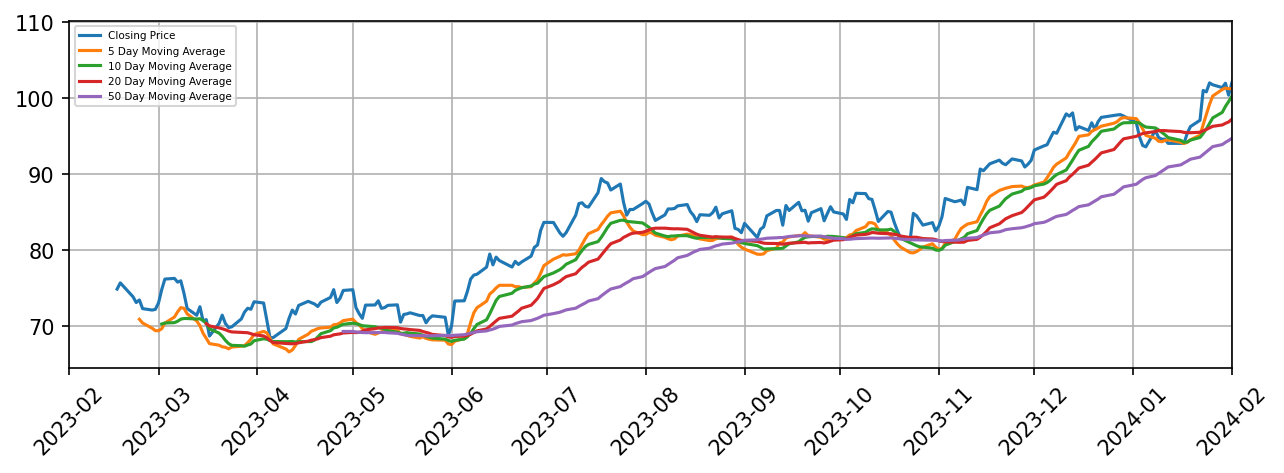

In [31]:
ticker = 'PCAR'

df_ticker = stock_data2(ticker, start_date = '2023-02-16', end_date = '2024-02-20')

df_ticker['5 less 20'] = df_ticker['5 MA'] < df_ticker['20 MA'] 
df_ticker['20 less 50'] = df_ticker['20 MA'] < df_ticker['50 MA']
df_ticker['5 more 20'] = df_ticker['5 MA'] > df_ticker['20 MA'] 
df_ticker['20 more 50'] = df_ticker['20 MA'] > df_ticker['50 MA']
df_ticker['50 more 100'] = df_ticker['50 MA'] > df_ticker['100 MA']

df_ticker['Buy'] = np.where(df_ticker['5 less 20'] & df_ticker['20 less 50'] == True, True, False)
df_ticker['Sell'] = np.where(df_ticker['20 more 50'] & df_ticker['50 more 100'] == True, True, False)
#df_ticker['Buy/Sell Balance'] = df_ticker['Buy'].cumsum() - df_ticker['Sell'].cumsum()

nrows = df_ticker.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_ticker['Shares'] = null_column
df_ticker['Cash'] = null_column

df_ticker.loc[df_ticker['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

ticker_shares = 0
ticker_cash = 10000
ticker_expense = 0

for i in range(nrows):
    if df_ticker.loc[i,'Buy'] == True:
        ticker_shares = ticker_shares + 5
        ticker_expense = ticker_expense + 5 * df_ticker.loc[i,'Close']

ticker_cash = ticker_shares*df_ticker['Close'].values[-1] 
print(ticker_cash, ticker_shares, ticker_expense)
print(df_ticker.loc[:,['Buy', 'Sell']].tail(5))


df = df_ticker

nrows = df.shape[0]

fig, ax = plt.subplots(figsize = (10,3), dpi = 150)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['Close'], label = "Closing Price")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.plot(df['Date'], df['50 MA'], label = "50 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0    71.543999
1    72.327576
2    70.578873
3    69.852631
4    70.177528
Name: Adj Close, dtype: float64


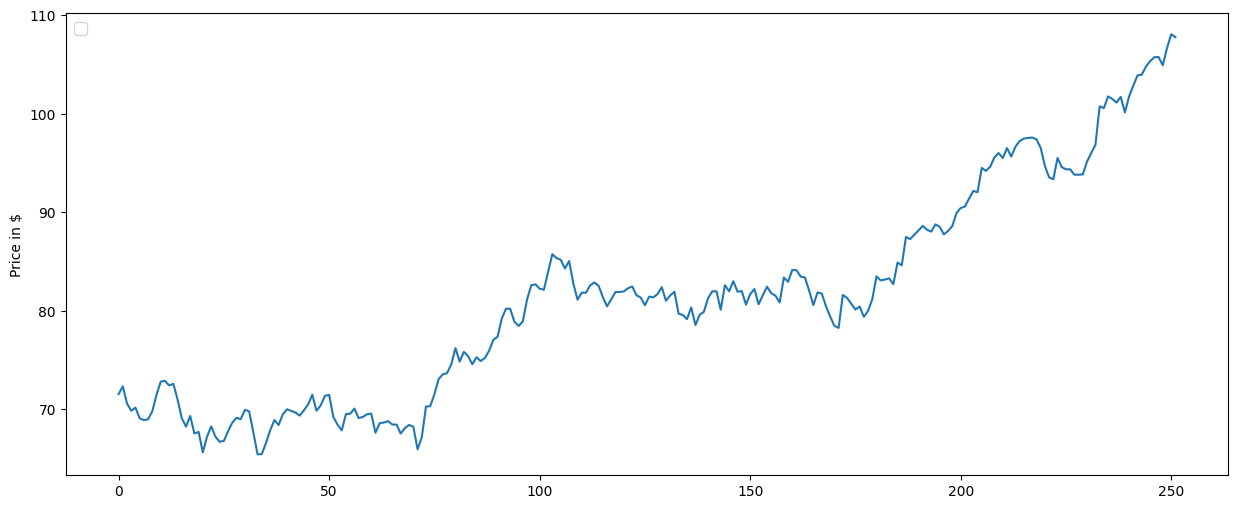

In [11]:
df1 = df_ticker['Adj Close']
print(df1.head())
plt.figure(figsize=(15, 6))
plt.plot(df1)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


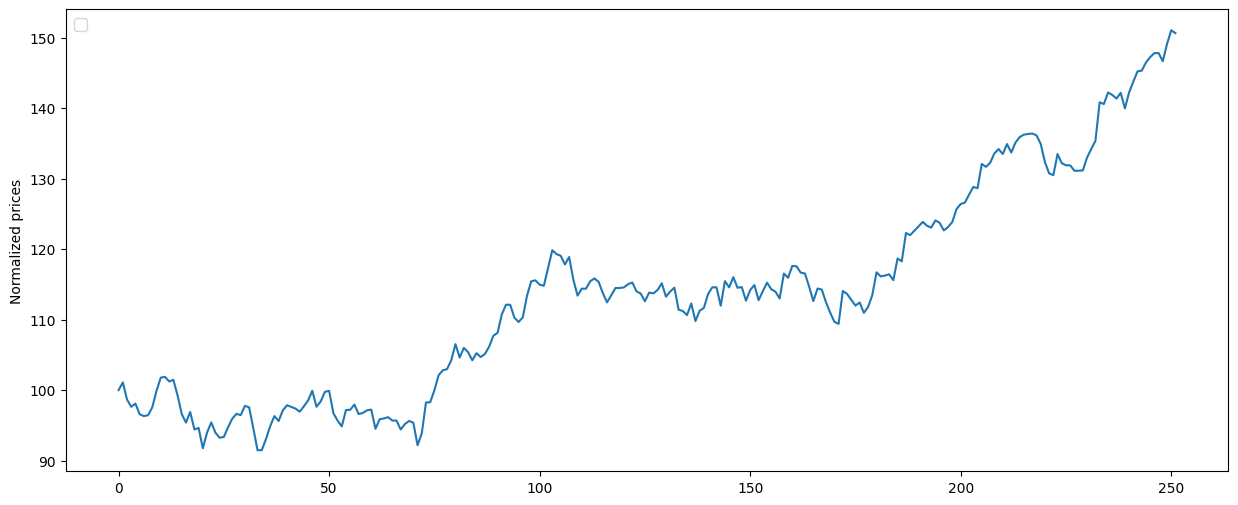

In [12]:
df3 = df1.divide(df1.iloc[0] / 100)

plt.figure(figsize=(15, 6))
plt.plot(df3)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Normalized prices')
plt.show()

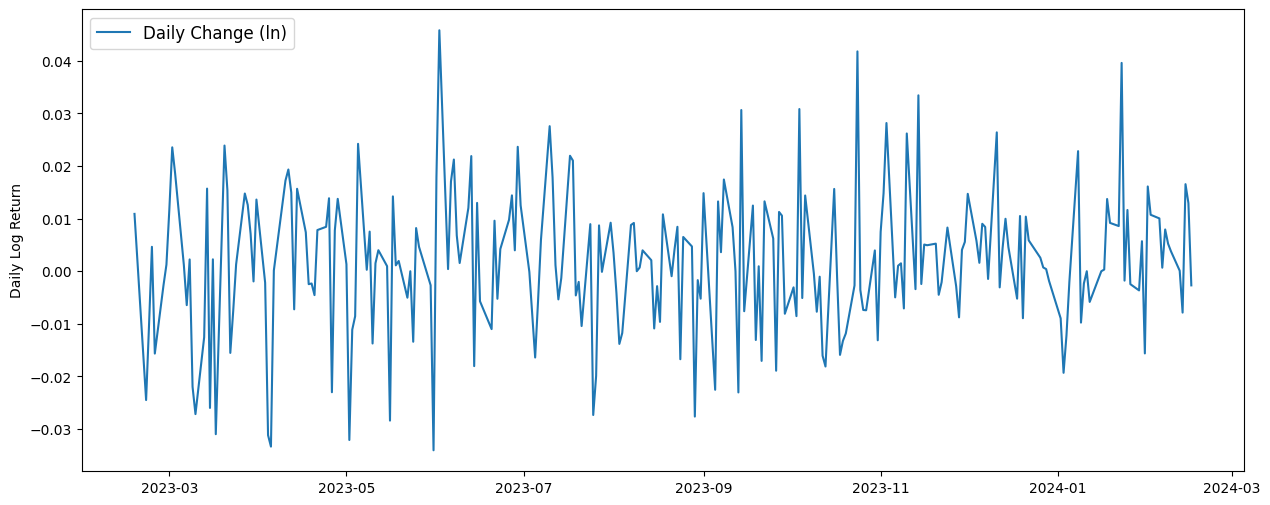

In [22]:
df_ticker

plt.figure(figsize=(15, 6))
plt.plot('Date' , 'Daily Change (ln)', data = df_ticker)
#plt.hlines(np.mean(df_ticker['Daily Change (ln)']))
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Daily Log Return')
plt.show()

<Axes: xlabel='Date', ylabel='Daily Change (ln)'>

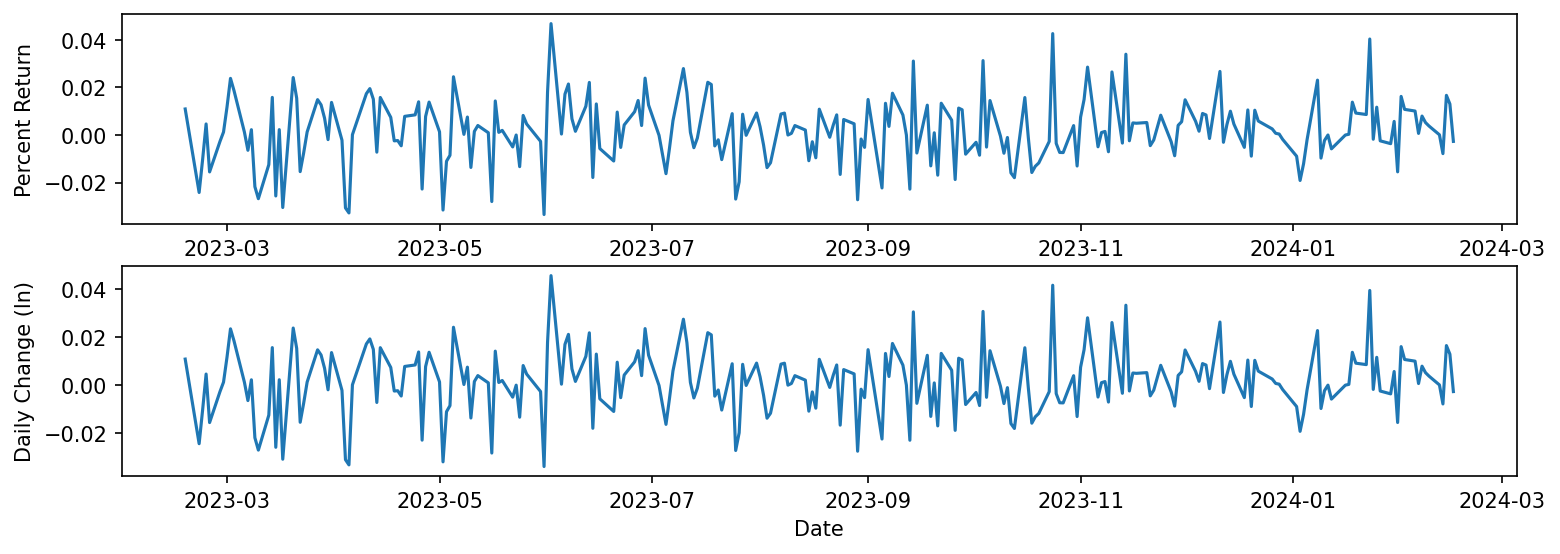

In [40]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,4), dpi = 150)

sns.lineplot(x = 'Date', y = 'Percent Return', data = df_ticker, ax = ax[0])
sns.lineplot(x = 'Date', y = 'Daily Change (ln)', data = df_ticker, ax = ax[1])

In [70]:
ticker     = ['IR', 'PCAR', 'SSD', 'WTS']
start_date = '2023-10-16'
end_date = datetime.now().strftime('%Y-%m-%d')

df_stocks = yf.download(ticker, start = start_date, end = end_date, progress = False)

df_stocks = df_stocks['Adj Close']

df_stocks.head()

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarnin

Ticker,IR,PCAR,SSD,WTS
Date,,,,
2023-10-16,64.931496,81.849945,138.606506,184.812439
2023-10-17,65.641296,81.753761,138.087234,182.716370
2023-10-18,62.372223,80.464798,134.182678,174.921036
2023-10-19,61.202560,79.406670,132.894485,174.362091
2023-10-20,60.402782,78.473610,131.716125,171.946625


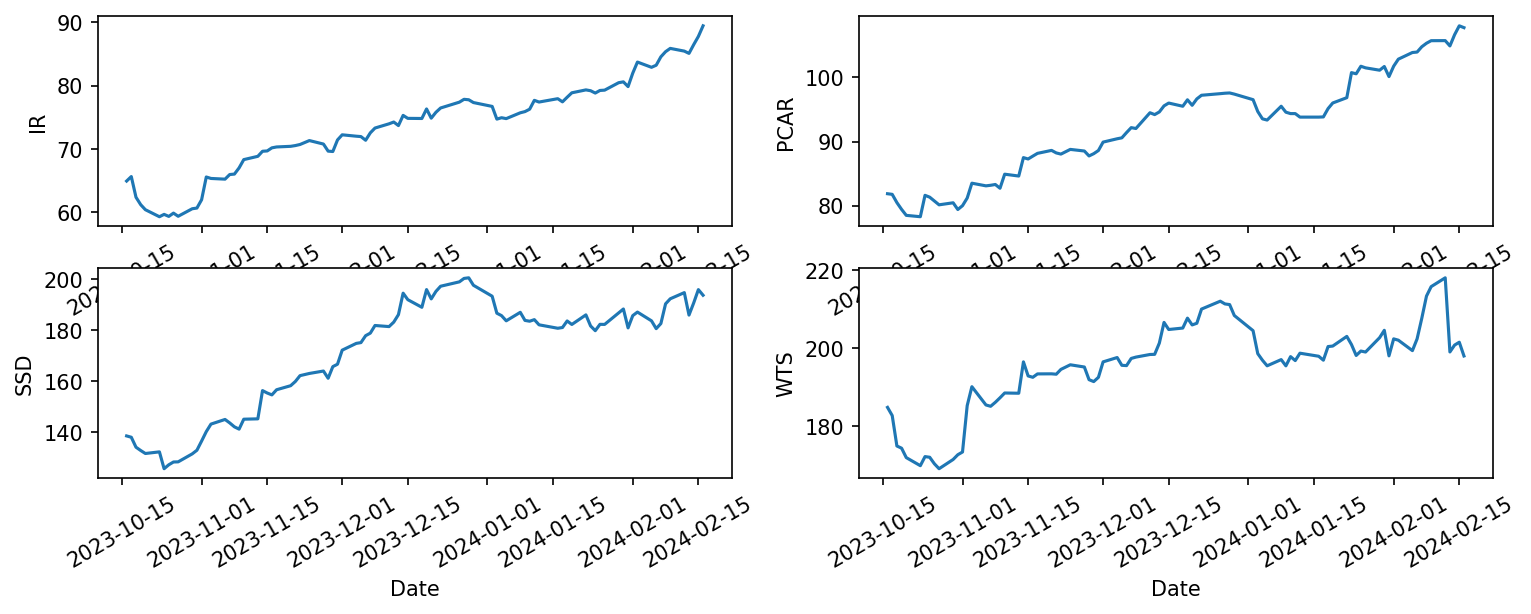

In [72]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,4), dpi = 150)

sns.lineplot(x = 'Date', y = 'IR', data = df_stocks, ax = ax[0, 0])
sns.lineplot(x = 'Date', y = 'PCAR', data = df_stocks, ax = ax[0, 1])
sns.lineplot(x = 'Date', y = 'SSD', data = df_stocks, ax = ax[1, 0])
sns.lineplot(x = 'Date', y = 'WTS', data = df_stocks, ax = ax[1, 1])

ax[0][0].tick_params(axis='x', rotation = 30)
ax[0][1].tick_params(axis='x', rotation = 30)
ax[1][0].tick_params(axis='x', rotation = 30)
ax[1][1].tick_params(axis='x', rotation = 30)

In [79]:
# CREATE TICKER INSTANCE FOR AMAZON
ticker_llap = yf.Ticker("AMZN")

# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
end_date = datetime.now().strftime('%Y-%m-%d')
llap_hist = ticker_llap.history(start = '2023-01-01',end = end_date)
print(llap_hist)

                                 Open        High         Low       Close  \
Date                                                                        
2023-01-03 00:00:00-05:00   85.459999   86.959999   84.209999   85.820000   
2023-01-04 00:00:00-05:00   86.550003   86.980003   83.360001   85.139999   
2023-01-05 00:00:00-05:00   85.330002   85.419998   83.070000   83.120003   
2023-01-06 00:00:00-05:00   83.029999   86.400002   81.430000   86.080002   
2023-01-09 00:00:00-05:00   87.459999   89.480003   87.080002   87.360001   
...                               ...         ...         ...         ...   
2024-02-22 00:00:00-05:00  173.100006  174.800003  171.770004  174.580002   
2024-02-23 00:00:00-05:00  174.279999  175.750000  173.699997  174.990005   
2024-02-26 00:00:00-05:00  175.699997  176.369995  174.259995  174.729996   
2024-02-27 00:00:00-05:00  174.080002  174.619995  172.860001  173.539993   
2024-02-28 00:00:00-05:00  172.440002  174.050003  172.270004  173.160004   

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [80]:
llap_hist = ticker_llap.history(start = '2024-02-26' , end = end_date, interval = '5m')
print(llap_hist)

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-02-26 09:30:00-05:00  175.699997  176.369995  174.929993  174.949997   
2024-02-26 09:35:00-05:00  174.964996  175.479996  174.770004  175.356995   
2024-02-26 09:40:00-05:00  175.380005  175.648407  175.160004  175.240097   
2024-02-26 09:45:00-05:00  175.244995  175.639999  174.834793  175.110001   
2024-02-26 09:50:00-05:00  175.089996  175.220001  174.639999  174.880005   
...                               ...         ...         ...         ...   
2024-02-28 15:35:00-05:00  173.300003  173.309998  173.134995  173.210007   
2024-02-28 15:40:00-05:00  173.213303  173.235001  173.110001  173.119995   
2024-02-28 15:45:00-05:00  173.111893  173.149994  172.979996  173.059998   
2024-02-28 15:50:00-05:00  173.059998  173.080002  172.945007  172.970001   
2024-02-28 15:55:00-05:00  172.970001  173.190002  172.940002  173.190002   

In [81]:
df_stocks = yf.download('LLAP', start = start_date, end = end_date, progress = False)
print(df_stocks)

             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2023-10-16  0.730  0.750  0.710  0.731      0.731  2061100
2023-10-17  0.737  0.750  0.723  0.736      0.736  2051400
2023-10-18  0.737  0.742  0.697  0.719      0.719  1700000
2023-10-19  0.713  0.723  0.656  0.666      0.666  2667800
2023-10-20  0.666  0.677  0.641  0.663      0.663  2868300
...           ...    ...    ...    ...        ...      ...
2024-02-22  0.990  0.990  0.930  0.968      0.968  2719300
2024-02-23  0.955  0.975  0.931  0.932      0.932  2526900
2024-02-26  0.950  1.030  0.947  1.020      1.020  2693400
2024-02-27  1.020  1.050  1.010  1.030      1.030  1778200
2024-02-28  1.030  1.130  1.020  1.080      1.080  3733400

[93 rows x 6 columns]


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [132]:
tickers = ['PCAR', 'SSD', 'WTS', 'IR']

df_portfolio = yf.download(tickers, start = "2023-01-01", end = end_date, group_by='tickers')
df_portfolio.head()

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11

Ticker             IR                                                       \
Price            Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2023-01-03  52.669998  53.099998  51.974998  53.000000  52.933136  2099500   
2023-01-04  53.400002  53.830002  52.980000  53.650002  53.582321  2564500   
2023-01-05  53.369999  53.750000  52.910000  53.389999  53.322643  2092000   
2023-01-06  54.169998  55.290001  53.570000  55.119999  55.050461  2983600   
2023-01-09  55.639999  56.529999  55.450001  55.779999  55.709625  2042300   

Ticker           PCAR                                   ...        SSD  \
Price            Open       High        Low      Close  ...        Low   
Date                                                    ...              
2023-01-03  65.919998  66.153336  65.113335  65.620003  ...  89.519997   
2023-01-04  66.046669  66.233330  65.180000  65.473335  ...  92.050003   
2023-01-05  65.286667  65.493332  64.639999  65.186668  ...  90.989998   
2023-01-06  65.660004  67.073334  65.660004  66.879997  ...  93.510002   
2023-01-09  66.839996  67.446671  66.353333  66.526665  ...  96.059998   

Ticker                                           WTS                          \
Price           Close  Adj Close  Volume        Open        High         Low   
Date                                                                           
2023-01-03  91.419998  90.459877  189500  147.619995  147.889999  143.610001   
2023-01-04  92.910004  92.196442  216300  146.559998  147.710007  144.490005   
2023-01-05  92.480003  91.769737  130000  143.940002  145.570007  142.100006   
2023-01-06  96.230003  95.490944  171600  144.820007  149.250000  144.820007   
2023-01-09  96.940002  96.195488  170700  149.059998  151.860001  149.059998   

Ticker                                      
Price            Close   Adj Close  Volume  
Date                                        
2023-01-03  145.619995  144.505981  226800  
2023-01-04  144.910004  143.801407   92900  
2023-01-05  143.139999  142.044952  121000  
2023-01-06  148.610001  147.473099   87500  
2023-01-09  149.779999  148.634155   85700  

[5 rows x 24 columns]

In [133]:
df_portfolio.iloc[:, [4, 10, 16, 22]].pct_change().mean()*252

Ticker  Price    
IR      Adj Close    0.490295
PCAR    Adj Close    0.529829
SSD     Adj Close    0.779373
WTS     Adj Close    0.314289
dtype: float64

<Axes: xlabel='Date', ylabel="('SSD', 'Adj Close')">

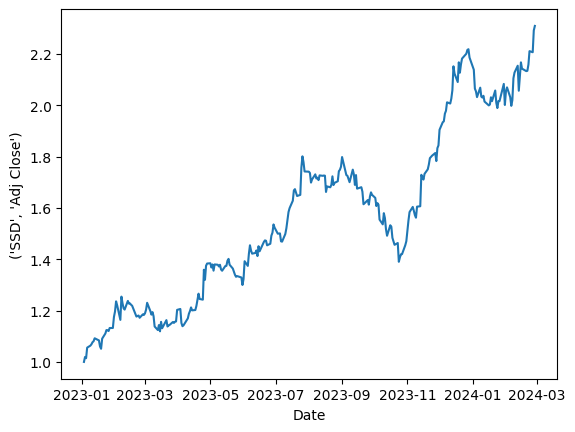

In [134]:
sns.lineplot(data = df_portfolio.iloc[:, 16]/df_portfolio.iloc[0, 16])

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed

Ticker  Price    
RKLB    Adj Close    0.351009
LLAP    Adj Close    0.343252
dtype: float64


<Axes: xlabel='Date', ylabel="('RKLB', 'Adj Close')">

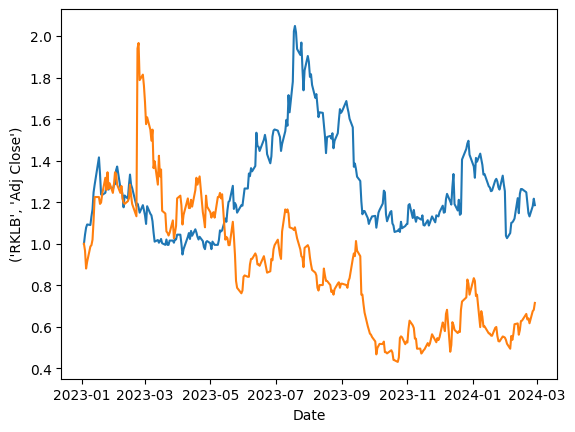

In [144]:
tickers = ['RKLB', 'LLAP']

df_portfolio = yf.download(tickers, start = "2023-01-01", end = end_date, group_by='tickers')
df_portfolio.head()

print(df_portfolio.iloc[:, [4, 10]].pct_change().mean()*252)



sns.lineplot(data = df_portfolio.iloc[:, 4]/df_portfolio.iloc[0, 4])
sns.lineplot(data = df_portfolio.iloc[:, 10]/df_portfolio.iloc[0, 10])

In [151]:
#companies = 'GOOG' 
#tickers = yf.Tickers('JNJ')
tickers_hist = yf.download('JNJ',  start = "2024-2-29", end = "2024-03-01", interval = '15m',)
tickers_hist

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-02-29 09:30:00,162.000000,162.000000,161.250000,161.895004,161.895004,608763
2024-02-29 09:45:00,161.880005,162.020004,161.250000,161.380005,161.380005,199187
2024-02-29 10:00:00,161.384995,161.470001,161.110001,161.210007,161.210007,241732
2024-02-29 10:15:00,161.210007,161.300003,161.039993,161.199997,161.199997,195935
2024-02-29 10:30:00,161.199997,161.369995,160.940002,161.300003,161.300003,211272
2024-02-29 10:45:00,161.300003,161.429993,161.279999,161.380005,161.380005,208364
2024-02-29 11:00:00,161.380096,161.940002,161.380005,161.845001,161.845001,224183
2024-02-29 11:15:00,161.849106,162.029999,161.750000,162.009995,162.009995,236185
2024-02-29 11:30:00,162.000000,162.000000,161.434998,161.434998,161.434998,171745


In [152]:
aapl = yf.Ticker("aapl")
aapl

yfinance.Ticker object <AAPL>

In [166]:
stocks_historical = yf.download(['SSD', 'RKLB'], start = "2023-02-28", end = "2024-03-01")
stocks_historical

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


Price      Adj Close              Close               High                Low  \
Ticker          RKLB         SSD   RKLB         SSD   RKLB         SSD   RKLB   
Date                                                                            
2023-02-28     4.500  107.031624  4.500  107.860001  4.640  108.750000  4.480   
2023-03-01     4.400  107.587318  4.400  108.419998  4.515  109.610001  4.172   
2023-03-02     4.240  108.867416  4.240  109.709999  4.355  109.779999  4.180   
2023-03-03     4.570  111.288681  4.570  112.150002  4.580  112.370003  4.220   
2023-03-06     4.430  108.361320  4.430  109.199997  4.600  112.290001  4.390   
...              ...         ...    ...         ...    ...         ...    ...   
2024-02-23     4.380  199.960007  4.380  199.960007  4.530  200.720001  4.360   
2024-02-26     4.570  199.570007  4.570  199.570007  4.600  201.240005  4.350   
2024-02-27     4.710  207.250000  4.710  207.250000  4.795  207.320007  4.570   
2024-02-28     4.590  208.839996  4.590  208.839996  4.770  209.449997  4.110   
2024-02-29     4.585  208.679993  4.585  208.679993  4.810  210.720001  4.490   

Price                   Open                Volume          
Ticker             SSD  RKLB         SSD      RKLB     SSD  
Date                                                        
2023-02-28  107.559998  4.55  107.559998   4606100  149400  
2023-03-01  107.000000  4.45  107.949997   6103300   95500  
2023-03-02  107.029999  4.35  107.410004   4333900   93400  
2023-03-03  108.790001  4.24  110.440002   4576200  143600  
2023-03-06  108.750000  4.58  112.290001   3422300   96400  
...                ...   ...         ...       ...     ...  
2024-02-23  195.820007  4.46  196.080002   6487900  202200  
2024-02-26  198.520004  4.39  199.169998   7252700  207700  
2024-02-27  201.559998  4.60  202.000000  11001900  365300  
2024-02-28  205.529999  4.42  206.000000  11858800  215400  
2024-02-29  206.770004  4.69  210.000000  11037500  201300  

[253 rows x 12 columns]

In [167]:
aapl_historical = aapl.history(start = "2024-02-26", end = "2024-03-01", interval = "15m")
aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-02-26 09:30:00-05:00,182.399994,182.759995,181.210007,181.235001,4034798,0.0,0.0
2024-02-26 09:45:00-05:00,181.240005,181.634995,181.148407,181.514999,1995591,0.0,0.0
2024-02-26 10:00:00-05:00,181.520004,181.845001,181.199997,181.615005,1606328,0.0,0.0
2024-02-26 10:15:00-05:00,181.610001,181.699997,181.341995,181.602203,1302403,0.0,0.0
2024-02-26 10:30:00-05:00,181.610001,181.850006,181.475006,181.550003,1264293,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-29 14:45:00-05:00,179.940002,180.199997,179.860001,180.199997,1468044,0.0,0.0
2024-02-29 15:00:00-05:00,180.199997,180.380005,180.195007,180.229996,1562462,0.0,0.0
2024-02-29 15:15:00-05:00,180.235001,180.699997,180.190002,180.585007,2017626,0.0,0.0


<Axes: xlabel='Date'>

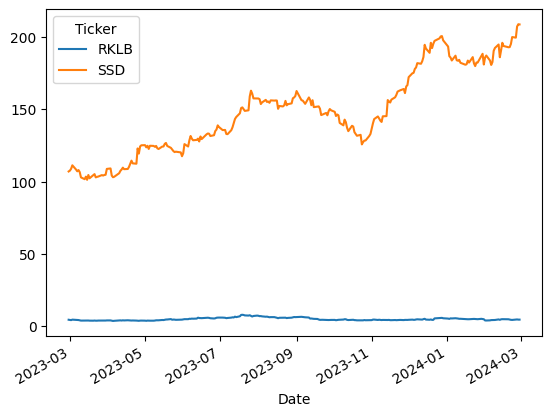

In [168]:
stocks_historical.loc[:,'Adj Close'].plot()

<Axes: xlabel='Date', ylabel='RKLB'>

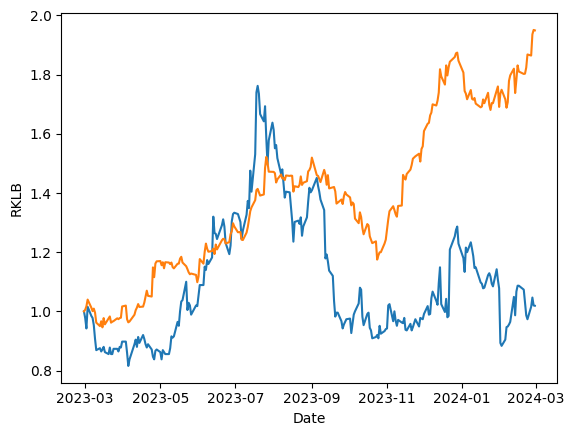

In [202]:
stocks_norm = stocks_historical.loc[:,'Adj Close']/stocks_historical.iloc[0]['Adj Close']

sns.lineplot(x = 'Date', y = 'RKLB', data = stocks_norm)
sns.lineplot(x = 'Date', y = 'SSD', data = stocks_norm)

In [194]:
stocks_historical['Adj Close'].iloc[0,:]

Ticker
RKLB      4.500000
SSD     107.031624
Name: 2023-02-28 00:00:00, dtype: float64

In [197]:
stocks_historical.iloc[0]['Adj Close']

Ticker
RKLB      4.500000
SSD     107.031624
Name: 2023-02-28 00:00:00, dtype: float64

In [260]:
end_date = datetime.now().strftime('%Y-%m-%d')

new_tickers = ['IR', 'PCAR', 'MU']

tickers = yf.Tickers(new_tickers)

tickers_hist = tickers.history(period = 'max', end = end_date, interval = '1m',)

tickers_hist['Close']


[*********************100%%**********************]  3 of 3 completed


Ticker,IR,MU,PCAR
Datetime,,,
2024-02-28 09:30:00-05:00,90.165001,90.739998,111.419998
2024-02-28 09:31:00-05:00,90.190002,90.599998,111.275002
2024-02-28 09:32:00-05:00,90.114998,90.410004,111.349998
2024-02-28 09:33:00-05:00,89.930000,90.419998,111.269997
2024-02-28 09:34:00-05:00,90.029999,90.570000,111.480003
...,...,...,...
2024-03-05 15:55:00-05:00,89.989998,94.485001,114.084999
2024-03-05 15:56:00-05:00,89.940002,94.419998,114.062500
2024-03-05 15:57:00-05:00,89.870003,94.459999,114.070000


In [263]:
df_norm = (tickers_hist['Close'][tickers_hist.index >= '2024-03-01'])/(tickers_hist['Close'][tickers_hist.index >= '2024-03-01'].iloc[0,])

<Axes: xlabel='Datetime'>

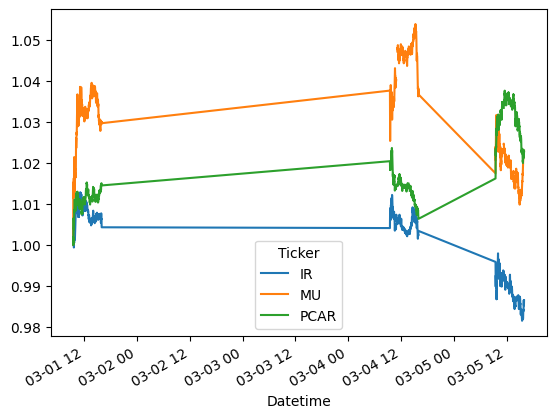

In [264]:
df_norm.plot()

In [226]:
df_AAPL = yf.download('AAPL', start = '2023-01-01', end = end_date, progress = False)

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


<Axes: xlabel='Date'>

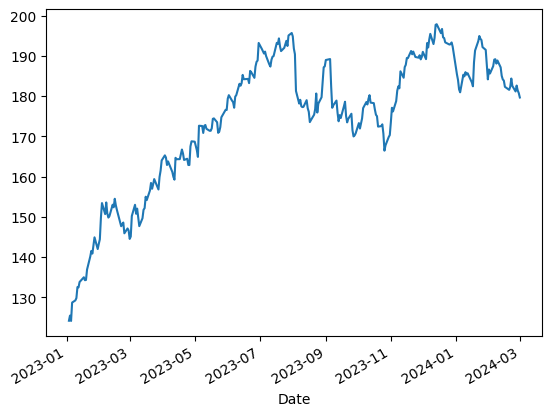

In [227]:
df_AAPL['Adj Close'].plot()

In [240]:
aapl_ticker = yf.Ticker('AAPL')
df_aapl = aapl_ticker.history(start = "2024-02-26", end = "2024-03-02", interval = "15m")

<Axes: xlabel='Datetime'>

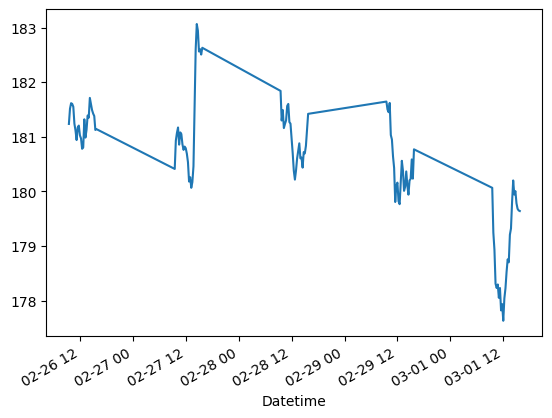

In [241]:
df_aapl['Close'].plot()